<a href="https://colab.research.google.com/github/julianovale/MCDA/blob/main/0006_TOPSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No handles with labels found to put in legend.


time =  0.0052921500000024935


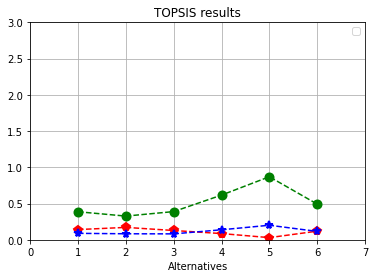

Closeness coefficient =  [0.38704994 0.32708518 0.38923951 0.61671064 0.86999539 0.49283341]


In [1]:
# Filename: TOPSIS.py
# Description: TOPSIS method
# Authors: Papathanasiou, J. & Ploskas, N.

from numpy import *
import matplotlib.pyplot as plt
import timeit

# Step 1: normalize the decision matrix
def norm(x, y):
    """ normalization function; x is the array with the
    performances and y is the normalization method.
    For vector input 'v' and for linear 'l'
	"""
    if y == 'v':
        k = array(cumsum(x**2, 0))
        z = array([[round(x[i, j] / sqrt(k[x.shape[0] - 1,
            j]), 3) for j in range(x.shape[1])]
            for i in range(x.shape[0])])
        return z
    else:
        yy = []
        for i in range(x.shape[1]):
            yy.append(amax(x[:, i:i + 1]))
            k = array(yy)
        z = array([[round(x[i, j] / k[j], 3)
            for j in range(x.shape[1])]
            for i in range(x.shape[0])])
        return z

# Step 2: find the weighted normalized decision matrix
def mul_w(r, t):
    """ multiplication of each evaluation by the associate
    weight; r stands for the weights matrix and t for
    the normalized matrix resulting from norm()
	"""
    z = array([[round(t[i, j] * r[j], 3)
        for j in range(t.shape[1])]
        for i in range(t.shape[0])])
    return z

# Step 3: calculate the ideal and anti-ideal solutions
def zenith_nadir(x, y):
    """ zenith and nadir virtual action function; x is the
    weighted normalized decision matrix and y is the
    action used. For min/max input 'm' and for absolute
    input enter 'a'
	"""
    if y == 'm':
        bb = []
        cc = []
        for i in range(x.shape[1]):
            bb.append(amax(x[:, i:i + 1]))
            b = array(bb)
            cc.append(amin(x[:, i:i + 1]))
            c = array(cc)
        return (b, c)
    else:
        b = ones(x.shape[1])
        c = zeros(x.shape[1])
        return (b, c)

# Step 4: determine the distance to the ideal and anti-ideal
# solutions
def distance(x, y, z):
    """ calculate the distances to the ideal solution (di+)
    and the anti-ideal solution (di-); x is the result
    of mul_w() and y, z the results of zenith_nadir()
	"""
    a = array([[(x[i, j] - y[j])**2 
		for j in range(x.shape[1])] 
		for i in range(x.shape[0])])
    b = array([[(x[i, j] - z[j])**2 
		for j in range(x.shape[1])]
        for i in range(x.shape[0])])
    return (sqrt(sum(a, 1)), sqrt(sum(b, 1)))

# TOPSIS method: it calls the other functions and includes
# step 5
def topsis(matrix, weight, norm_m, id_sol, pl):
    """ matrix is the initial decision matrix, weight is 
	the weights matrix, norm_m is the normalization 
	method, id_sol is the action used, and pl is 'y' 
	for plotting the results or any other string for 
	not 
	"""
    z = mul_w(weight, norm(matrix, norm_m))
    s, f = zenith_nadir(z, id_sol)
    p, n = distance(z, s, f)
    final_s = array([n[i] / (p[i] + n[i]) 
		for i in range(p.shape[0])])
    if pl == 'y':
        q = [i + 1 for i in range(matrix.shape[0])]
        plt.plot(q, p, 'p--', color = 'red', 
            markeredgewidth = 2, markersize = 8)
        plt.plot(q, n, '*--',  color = 'blue', 
            markeredgewidth = 2, markersize = 8)
        plt.plot(q, final_s, 'o--', color = 'green',
            markeredgewidth = 2, markersize = 8)
        plt.title('TOPSIS results')
        plt.legend(['Distance from the ideal', 
            'Distance from the anti-ideal', 
            'Closeness coefficient'])
        plt.xticks(range(matrix.shape[0] + 2))
        plt.axis([0, matrix.shape[0] + 1, 0, 3])
        plt.xlabel('Alternatives')
        plt.legend()
        plt.grid(True)
        plt.show()
    return final_s

# performances of the alternatives
x = array([[8, 7, 2, 1], [5, 3, 7, 5], [7, 5, 6, 4],
           [9, 9, 7, 3], [11, 10, 3, 7], [6, 9, 5, 4]])

# weights of the criteria
w = array([0.4, 0.3, 0.1, 0.2])

# final results
start = timeit.default_timer()
topsis(x, w, 'v', 'm', 'n')
stop = timeit.default_timer()
print("time = ", stop - start)
print("Closeness coefficient = ", 
	topsis(x, w, 'v', 'm', 'y'))